In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, recall_score, precision_score, accuracy_score, f1_score

In [2]:
df = pd.read_csv("C:\\Users\\BIPLAB\\Desktop\\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# shape
print(df.shape)

(284807, 31)


In [4]:
print(df.head(7))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.1

In [5]:
# check null values exist or not
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Text(0.5, 1.0, 'Transaction Class Distribution')

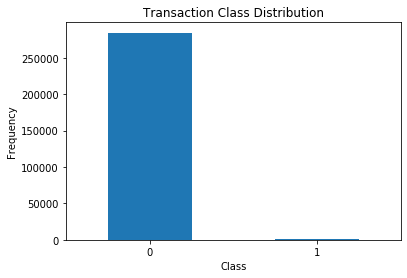

In [6]:
cnt_classes = pd.value_counts(df['Class'], sort = True)
cnt_classes.plot(kind = 'bar', rot = 0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Transaction Class Distribution")

In [7]:
df_new = df.sample(frac = 0.1, random_state = 1)
df_new.shape

(28481, 31)

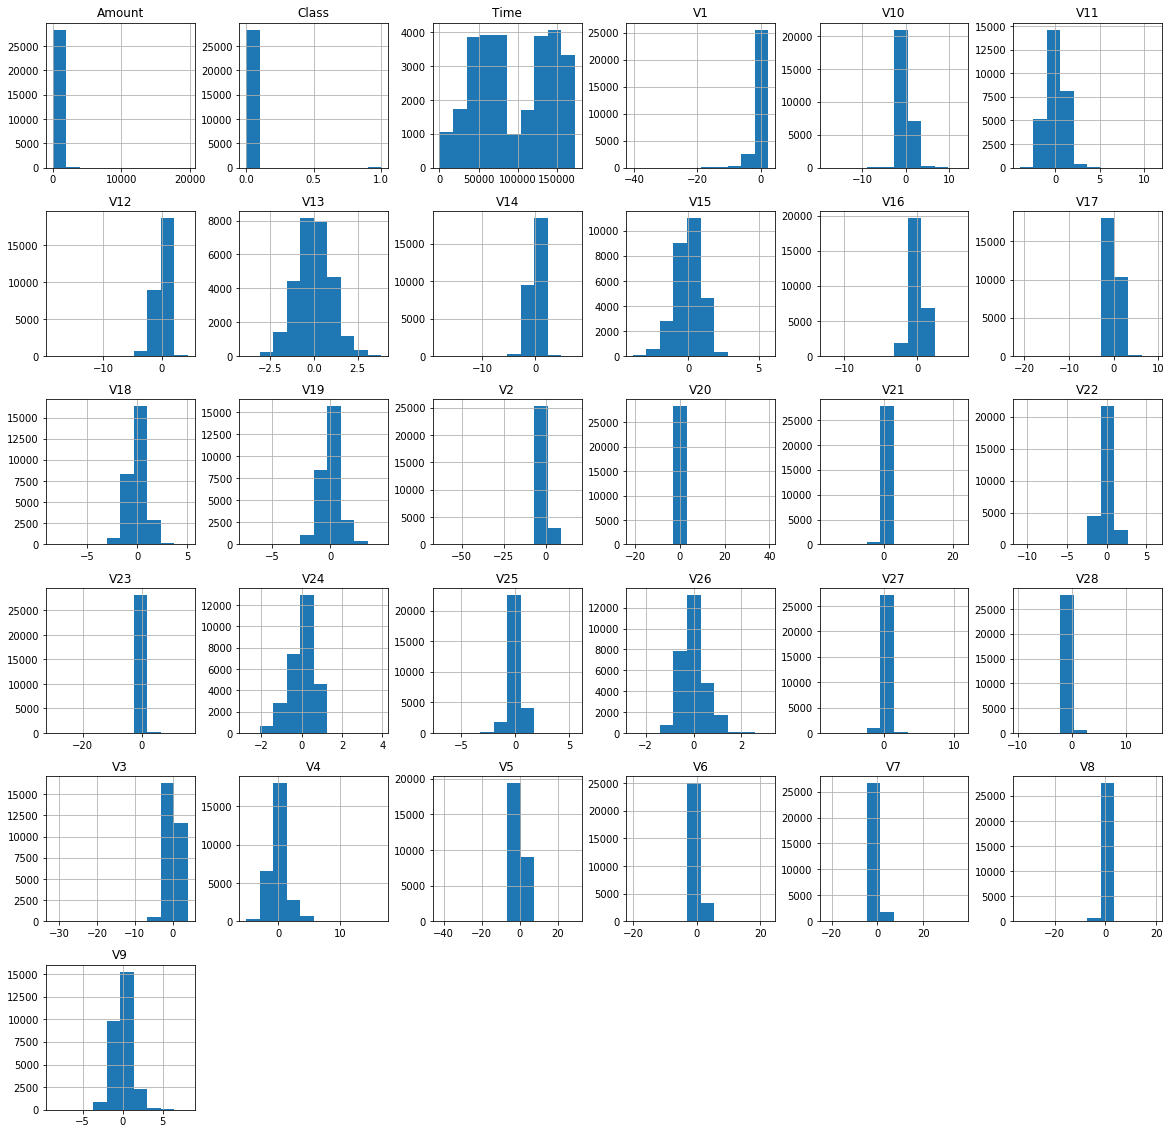

In [8]:
# Plotting the frequencies in a histogram for each feature
df_new.hist(figsize = (20,20))
plt.show()

In [9]:
print(df['Time'].tail(4))
df["Time_Hr"] = df["Time"]/3600
print(df['Time_Hr'].tail(4))

284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


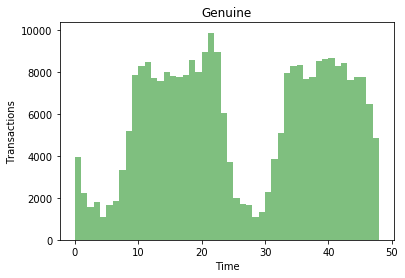

In [10]:
# Plotting against time to find a trend
plt.hist(df.Time_Hr[df.Class == 0],bins=48,color='g',alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Transactions")
plt.title("Genuine")
plt.show()

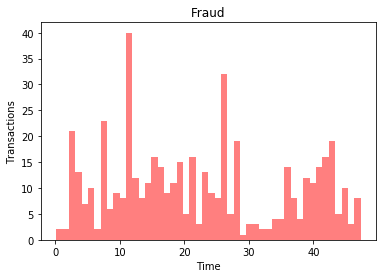

In [11]:
plt.hist(df.Time_Hr[df.Class == 1],bins=48,color='r',alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Transactions")
plt.title("Fraud")
plt.show()

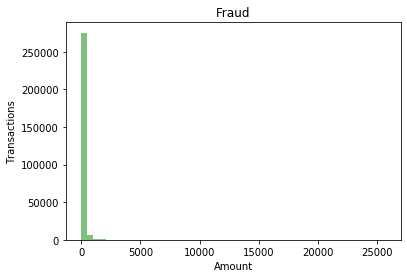

In [12]:
# Plotting against amount to find a trend
plt.hist(df.Amount[df.Class == 0],bins = 50,color = 'g',alpha=0.5)
plt.xlabel("Amount")
plt.ylabel("Transactions")
plt.title("Fraud")
plt.show()

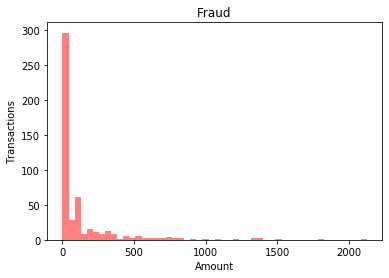

In [13]:
plt.hist(df.Amount[df.Class == 1],bins = 50,color = 'r',alpha=0.5)
plt.xlabel("Amount")
plt.ylabel("Transactions")
plt.title("Fraud")
plt.show()

In [14]:
# Standardizing the Amounts.
from sklearn.preprocessing import StandardScaler
df['Scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'], axis = 1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,Scaled_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000278,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000556,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,47.996111,-0.350151
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,47.996389,-0.254117
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,47.996667,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,47.996667,-0.313249


In [15]:
def split(df, dropped):
    df = df.drop(dropped, axis = 1)
    print(df.columns)
    # Train Test splitting
    from sklearn.model_selection import train_test_split
    y = df['Class']
    x = df.drop(['Class'], axis = 1)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 40, stratify = y)
    
    print("\nTrain size : ", len(y_train), "\nTest size : ", len(y_test))
    return x_train, x_test, y_train, y_test

# Check
drop = []
split(df, drop)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Time_Hr', 'Scaled_Amount'],
      dtype='object')

Train size :  227845 
Test size :  56962


(            Time        V1        V2        V3        V4        V5        V6  \
 159275  112388.0  2.026190 -0.041764 -1.395439  0.067624  0.314498 -0.530806   
 244838  152509.0 -0.195504  1.545041  1.031471  2.482815  1.695925  0.434180   
 156230  107586.0 -0.105025  1.309503 -0.365174 -0.391590  1.033099 -0.811986   
 48726    43759.0 -0.854246  0.701998  1.166225 -1.185470 -0.782259 -0.933049   
 144088   85853.0  1.060077  0.093933  0.099762  0.985735 -0.059163 -0.401092   
 ...          ...       ...       ...       ...       ...       ...       ...   
 35691    38224.0  0.954793 -0.177613  1.180126  2.811455 -0.470870  1.165166   
 121555   76237.0  1.163033  0.235939  0.413609  1.389495 -0.109340 -0.169348   
 51012    44750.0 -0.717907  0.780226  0.845612  0.562767 -0.000699 -1.067275   
 160120  113126.0  1.688272 -1.782414 -0.810458 -0.754815 -1.208454 -0.185804   
 75836    56275.0 -0.482144  0.471148  2.278648  1.579943 -0.218163  0.270482   
 
               V7        V

In [16]:
def predictions(classifier, x_train, y_train, x_test):
    classifier = classifier   #Creating the classifier
    classifier.fit(x_train, y_train)
    predict = classifier.predict(x_test)
    #Predicted probabilities
    prob = classifier.predict_proba(x_test)
    return predict, prob

In [17]:
def scores(y_test, predict, prob):
    print("\n1. Confusion matrix : ", confusion_matrix(y_test, predict))
    print("\n2. Recall score : ", recall_score(y_test, predict))
    print("\n3. Accuracy score : ", accuracy_score(y_test, predict))
    print("\n4. Precision score : ", precision_score(y_test, predict))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

class_names = df['Class']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


#Doing the actual prediction with Gaussian Naive Bayes

#Case 1 : Dropping none of the columns
dropped = []
X_train, X_test, Y_train, Y_test = split(df, dropped)
y_pred, y_prob = predictions(GaussianNB(), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

In [16]:
#Case 2 : We are dropping some important parameters of the PCA components
dropped = ['V6', 'V28', 'V27', 'V16', 'V18', 'V9', 'V10', 'V25', 'V20', 'V17', 'V11']
X_train, X_test, Y_train, Y_test = split(df, dropped)
y_pred, y_prob = predictions(GaussianNB(), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V12', 'V13', 'V14',
       'V15', 'V19', 'V21', 'V22', 'V23', 'V24', 'V26', 'Class', 'Time_Hr',
       'Scaled_Amount'],
      dtype='object')

Train size :  227845 
Test size :  56962

 [0 0 0 ... 0 0 0] [[9.99999999e-01 6.07427451e-10]
 [1.00000000e+00 3.02505906e-10]
 [9.99999998e-01 2.11810234e-09]
 ...
 [9.99999999e-01 5.23807259e-10]
 [1.00000000e+00 3.46822159e-10]
 [9.99999988e-01 1.16500977e-08]]

1. Confusion matrix :  [[56468   396]
 [   47    51]]

2. Recall score :  0.5204081632653061

3. Accuracy score :  0.9922228854323936

4. Precision score :  0.11409395973154363


In [17]:
#Case 3 : We are dropping some important parameters of the PCA components and Time too
dropped = ['Time_Hr', 'V6', 'V28', 'V27', 'V16', 'V18', 'V9', 'V10', 'V25', 'V20', 'V17', 'V11', 'V8', 'V5']
X_train, X_test, Y_train, Y_test = split(df, dropped)
y_pred, y_prob = predictions(GaussianNB(), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V7', 'V12', 'V13', 'V14', 'V15', 'V19',
       'V21', 'V22', 'V23', 'V24', 'V26', 'Class', 'Scaled_Amount'],
      dtype='object')

Train size :  227845 
Test size :  56962

 [0 0 0 ... 0 0 0] [[9.99999994e-01 5.50918021e-09]
 [9.99999996e-01 4.22507608e-09]
 [9.99999985e-01 1.46682824e-08]
 ...
 [9.99999991e-01 8.79670568e-09]
 [9.99999996e-01 3.81166153e-09]
 [9.99999785e-01 2.15151012e-07]]

1. Confusion matrix :  [[56571   293]
 [   45    53]]

2. Recall score :  0.5408163265306123

3. Accuracy score :  0.9940662195849865

4. Precision score :  0.1531791907514451


In [18]:
#Case 4 : We are dropping some important parameters of the PCA components + Time + Scaled_Amount
dropped = ['Time_Hr', 'Scaled_Amount', 'V6', 'V27', 'V16', 'V18', 'V9', 'V10', 'V25', 'V20', 'V17', 'V11']
X_train, X_test, Y_train, Y_test = split(df, dropped)
y_pred, y_prob = predictions(GaussianNB(), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V12', 'V13', 'V14',
       'V15', 'V19', 'V21', 'V22', 'V23', 'V24', 'V26', 'V28', 'Class'],
      dtype='object')

Train size :  227845 
Test size :  56962

 [0 0 0 ... 0 0 0] [[1.00000000e+00 4.10211063e-10]
 [1.00000000e+00 3.51196080e-10]
 [9.99999999e-01 1.26487187e-09]
 ...
 [9.99999999e-01 7.06393382e-10]
 [1.00000000e+00 3.12586097e-10]
 [9.99999983e-01 1.71622036e-08]]

1. Confusion matrix :  [[56464   400]
 [   47    51]]

2. Recall score :  0.5204081632653061

3. Accuracy score :  0.9921526631789614

4. Precision score :  0.1130820399113082


In [24]:
#Doing the actual prediction with Logistic Regression
#Case 1 : Dropping none of the columns
dropd = []
X_train, X_test, Y_train, Y_test = split(df, dropd)
y_pred, y_prob = predictions(LogisticRegression(penalty = 'l1', C = 0.001), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Time_Hr', 'Scaled_Amount'],
      dtype='object')

Train size :  227845 
Test size :  56962


C:\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 [0 0 0 ... 0 0 0] [[9.90087467e-01 9.91253302e-03]
 [9.99979912e-01 2.00880157e-05]
 [9.74647001e-01 2.53529995e-02]
 ...
 [9.99998473e-01 1.52669312e-06]
 [9.99680064e-01 3.19936392e-04]
 [9.99999512e-01 4.87726767e-07]]

1. Confusion matrix :  [[56847    17]
 [   68    30]]

2. Recall score :  0.30612244897959184

3. Accuracy score :  0.9985077771145676

4. Precision score :  0.6382978723404256


In [25]:
#Case 2 : We are dropping some important parameters of the PCA components
dropd = ['V6', 'V28', 'V27', 'V16', 'V18', 'V9', 'V10', 'V25', 'V20', 'V17', 'V11', 'V8', 'V12', 'V21', 'V22']
X_train, X_test, Y_train, Y_test = split(df, dropd)
y_pred, y_prob = predictions(LogisticRegression(penalty = 'l1', C = 0.001), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V13', 'V14', 'V15', 'V19',
       'V23', 'V24', 'V26', 'Class', 'Time_Hr', 'Scaled_Amount'],
      dtype='object')

Train size :  227845 
Test size :  56962


C:\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 [0 0 0 ... 0 0 0] [[9.90913687e-01 9.08631344e-03]
 [9.99977869e-01 2.21309960e-05]
 [9.74996540e-01 2.50034598e-02]
 ...
 [9.99998545e-01 1.45511462e-06]
 [9.99699383e-01 3.00616688e-04]
 [9.99999510e-01 4.90145806e-07]]

1. Confusion matrix :  [[56839    25]
 [   68    30]]

2. Recall score :  0.30612244897959184

3. Accuracy score :  0.9983673326077034

4. Precision score :  0.5454545454545454


In [26]:
#Case 3 : We are dropping some important parameters of the PCA components + Time + Scaled_Amount
dropd = ['Time_Hr', 'V6', 'V28', 'V27', 'V16', 'V18', 'V9', 'V10', 'V25', 'V20', 'V17', 'V11', 'V8', 'V5']
X_train, X_test, Y_train, Y_test = split(df, dropd)
y_pred, y_prob = predictions(LogisticRegression(penalty = 'l1', C = 0.001), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V7', 'V12', 'V13', 'V14', 'V15', 'V19',
       'V21', 'V22', 'V23', 'V24', 'V26', 'Class', 'Scaled_Amount'],
      dtype='object')

Train size :  227845 
Test size :  56962


C:\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 [0 0 0 ... 0 0 0] [[9.90913247e-01 9.08675255e-03]
 [9.99977948e-01 2.20517326e-05]
 [9.74983178e-01 2.50168222e-02]
 ...
 [9.99998552e-01 1.44777155e-06]
 [9.99699964e-01 3.00035782e-04]
 [9.99999512e-01 4.87547090e-07]]

1. Confusion matrix :  [[56839    25]
 [   68    30]]

2. Recall score :  0.30612244897959184

3. Accuracy score :  0.9983673326077034

4. Precision score :  0.5454545454545454


In [28]:
#Case 4 : We are dropping some important parameters of the PCA components + Time + Scaled_Amount
dropd = ['Time_Hr', 'Scaled_Amount', 'V6', 'V27', 'V16', 'V18', 'V9', 'V10', 'V25', 'V20', 'V17', 'V11', 'V5', 'V8', 'V21', 'V22']
X_train, X_test, Y_train, Y_test = split(df, dropd)
y_pred, y_prob = predictions(LogisticRegression(penalty = 'l1', C = 0.001), X_train, Y_train, X_test)
print("\n",y_pred, y_prob)
scores(Y_test, y_pred, y_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V7', 'V12', 'V13', 'V14', 'V15', 'V19',
       'V23', 'V24', 'V26', 'V28', 'Class'],
      dtype='object')

Train size :  227845 
Test size :  56962


C:\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 [0 0 0 ... 0 0 0] [[9.90912646e-01 9.08735377e-03]
 [9.99977883e-01 2.21172929e-05]
 [9.74996423e-01 2.50035768e-02]
 ...
 [9.99998546e-01 1.45387434e-06]
 [9.99699468e-01 3.00531754e-04]
 [9.99999510e-01 4.89856323e-07]]

1. Confusion matrix :  [[56839    25]
 [   68    30]]

2. Recall score :  0.30612244897959184

3. Accuracy score :  0.9983673326077034

4. Precision score :  0.5454545454545454


In [31]:
# We see performance on imbalanced dataset is poor
# So we train the model on 50/50 under-sampled data, i.e, we take 50/50 ratio of both the classes

# Step 1: Get indices of fraud and genuine data
f_ind = np.array(df[df.Class == 1].index)
g_ind = df[df.Class == 0].index

# Total number of fraud cases
fraud = len(df[df.Class == 1])

# Step 2: Select randomly from genuine class
rand_gen = np.array(np.random.choice(g_ind, fraud, replace = False))

# Step 3: Merging the two class indices : random genuine + original fraud
under_sample = np.concatenate([f_ind, rand_gen])

# Step 4: Creating the undersampled dataset and separating features and target data
new_df = df.iloc[under_sample,:]     # Creating the under sample dataset
y_df = new_df['Class'].values        # Label/Target
x_df = new_df.drop(['Class'], axis = 1).values      # Features

# Step 5: Some information extraction
print("\nTransactions in undersampled data : ", len(new_df))
print("\nPercetage genuine transactions : ", int((len(new_df[new_df.Class == 0])/len(new_df))*100), "%")
print("\nPercetage fraud transactions : ", int((len(new_df[new_df.Class == 1])/len(new_df))*100), "%")


Transactions in undersampled data :  984

Percetage genuine transactions :  50 %

Percetage fraud transactions :  50 %


In [32]:
# Now we train the Logistic Regression model on the undersampled dataset

drpd = []
X_train_new, X_test_new, Y_train_new, Y_test_new = split(new_df, drpd)
y_pred_new, y_pred_prob_new = predictions(LogisticRegression(C = 0.01, penalty = 'l1'), X_train_new, Y_train_new, X_test_new)
print("\n", y_pred_new, y_pred_prob_new)
scores(Y_test_new, y_pred_new, y_pred_prob_new)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Time_Hr', 'Scaled_Amount'],
      dtype='object')

Train size :  787 
Test size :  197

 [0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 1 0 1 1 0 1 0] [[7.11781221e-01 2.88218779e-01]
 [5.62362470e-03 9.94376375e-01]
 [7.28694654e-01 2.71305346e-01]
 [1.22679044e-01 8.77320956e-01]
 [6.50735038e-01 3.49264962e-01]
 [6.74774100e-01 3.25225900e-01]
 [5.78317603e-01 4.21682397e-01]
 [7.96562520e-01 2.03437480e-01]
 [7.63126742e

C:\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 0.8775510204081632

3. Accuracy score :  0.9137055837563451

4. Precision score :  0.945054945054945


In [34]:
# Now let us train on the undersampled dataset and test on the entire dataset
Y_total = df['Class'].values     # Label/Target
X_total = df.drop(['Class'], axis = 1).values     # Features

logr = LogisticRegression(C = 0.002, penalty = 'l1')
logr.fit(x_df, y_df)
p = logr.predict(X_total)

print("\nConfusion matrix : \n", confusion_matrix(Y_total, p)) 
print("\nPrecision score : ", precision_score(Y_total, p))
print("\nAccuracy score : ", accuracy_score(Y_total, p))

C:\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Confusion matrix : 
 [[279614   4701]
 [    88    404]]

Precision score :  0.07913809990205681

Accuracy score :  0.9831851042987005


In [35]:
'''Hence we see that Logistic Regression gives better model sensitivity, whereas predictive value(positive) is more for 
   Gaussian Naive Bayes. '''

'Hence we see that Logistic Regression gives better model sensitivity, whereas predictive value(positive) is more for \n   Gaussian Naive Bayes. '